# E-Commerce and the Importance of Churn Prediction  

E-commerce has revolutionized the way businesses operate, providing customers with convenience and a vast range of products at their fingertips. With increasing competition and customer choices, retaining existing customers has become just as important as acquiring new ones.  

Customer churn, the rate at which customers stop doing business with a company, is a critical metric for e-commerce platforms. High churn rates can lead to revenue loss and increased marketing costs to acquire new customers. By predicting churn, businesses can take proactive steps to retain customers through personalized offers, targeted marketing, and improved customer experiences.  

This project focuses on predicting customer churn using historical transaction data, helping businesses identify at-risk customers and optimize their retention strategies.  

In [1]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Loading the dataset
df = pd.read_csv('../data/ecommerce_churn_data.csv')

In [4]:
# Display first few rows
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
# Check data types & missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [7]:
# Check for null values
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

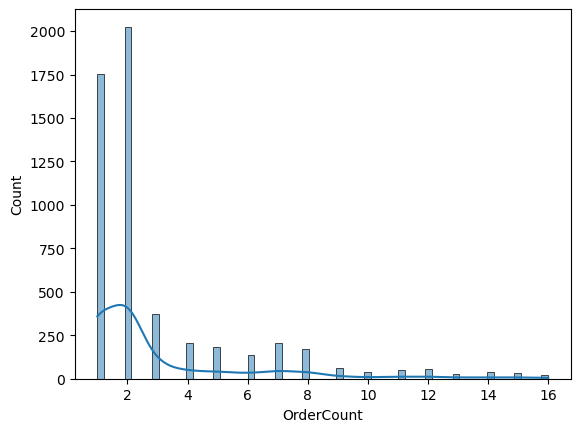

In [8]:
# Checking distribution before imputation

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['OrderCount'], kde=True)
plt.show()

Since OrderCount and other numerical features are skewed, we use the median instead of the mean for missing value imputation.

## Data Preprocessing & Feature Engineering

In [9]:
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
            'OrderAmountHikeFromlastYear', 'CouponUsed', 
            'OrderCount', 'DaySinceLastOrder']

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [10]:
# Verify missing values are handled
print(df.isnull().sum())

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [11]:
# Display unique values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


### Standardizing category names for consistency  


In [12]:
# Replacing 'Phone' with 'Mobile Phone' to maintain uniformity  

df['PreferredLoginDevice'].replace({'Phone': 'Mobile Phone'}, inplace=True)

In [13]:
# Replacing 'CC' with 'Credit Card' and 'COD' with 'Cash on Delivery'  

df['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'}, inplace=True)

In [14]:
# Replacing 'Mobile' with 'Mobile Phone' to avoid confusion with other mobile-related products

df['PreferedOrderCat'].replace({'Mobile': 'Mobile Phone'}, inplace=True)  

In [15]:
# Check for the updates
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

PreferredLoginDevice: ['Mobile Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


## Exploratory Data Analysis

In [16]:
# churn distribution (class balance)
df['Churn'].value_counts(normalize=True) * 100

Churn
0    83.161634
1    16.838366
Name: proportion, dtype: float64

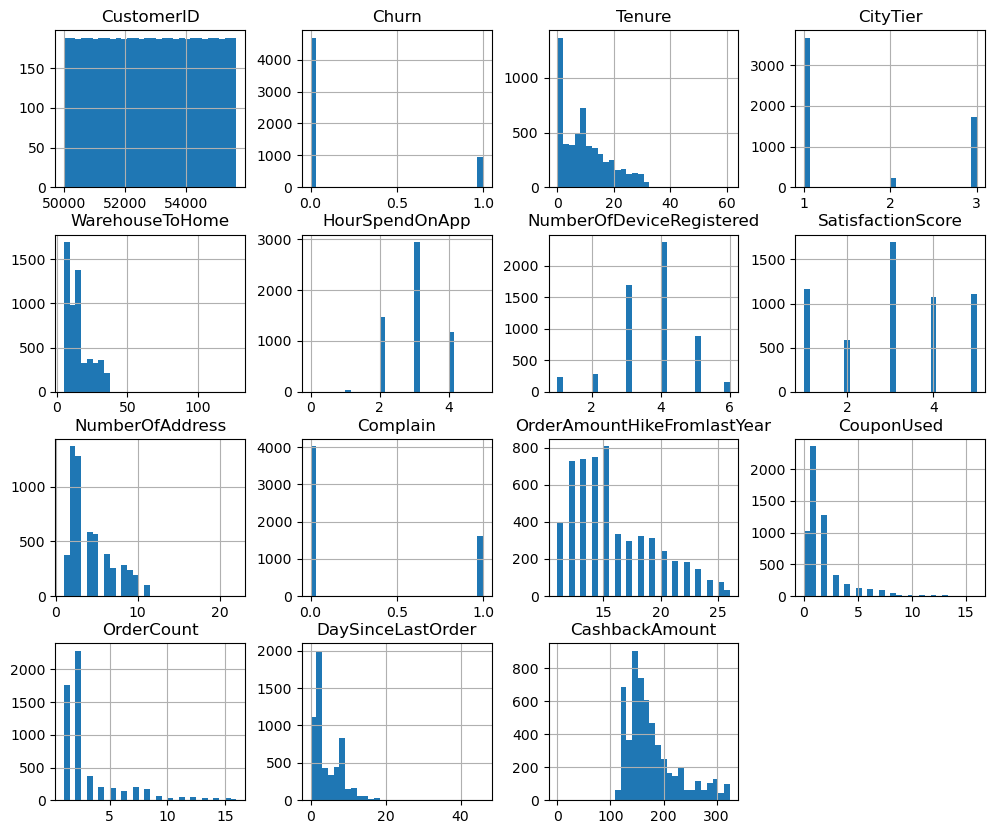

In [17]:
# Distributions of numerical features:

df.hist(figsize=(12, 10), bins=30)  
plt.show()

### Observations

- Many features (WarehouseToHome, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount) are right-skewed, meaning most values are low but a few are very high - possible outliers to handle
- Churn and Complain are binary (0 or 1).
- CustomerID is just an identifier and can be dropped before modeling.
- SatisfactionScore, CityTier, NumberOfDeviceRegistered, and NumberOfAddress seem to have a small set of distinct values and can be treated as categorical variables instead of numerical ones

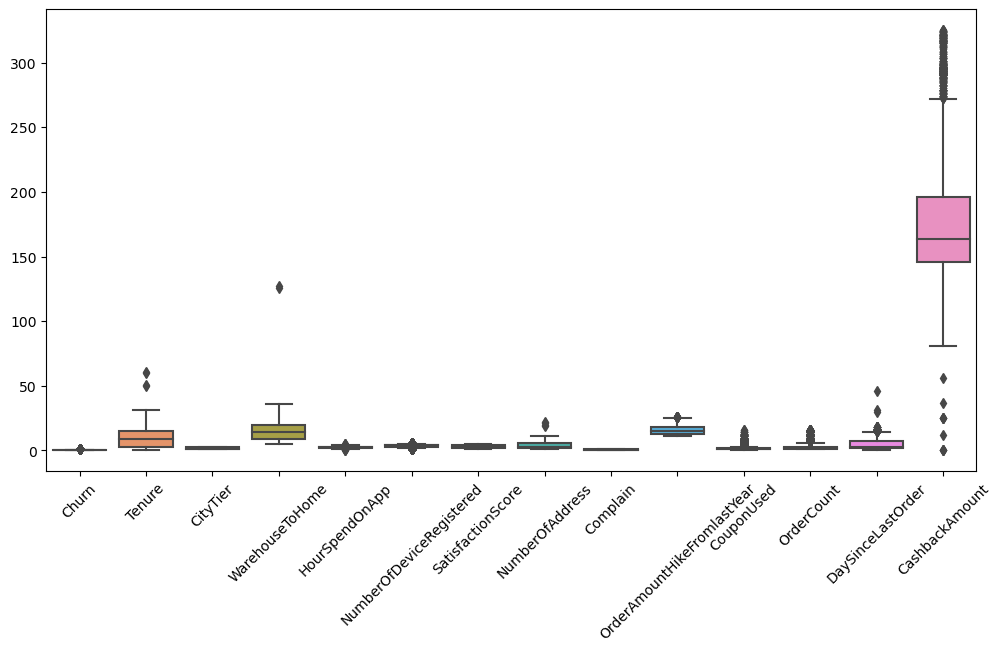

In [18]:
# To detect outliers - customerID is unique so would be highly dominating so dropping the column for the plotting

plt.figure(figsize=(12, 6))  
sns.boxplot(data=df.drop(columns=['CustomerID']))  # Dropping 'CustomerID' from the boxplot  
plt.xticks(rotation=45)  
plt.show()

### Observations
- Several features (e.g., CashbackAmount, WarehouseToHome, DaySinceLastOrder, Tenure) have extreme outliers that may need handling (removal, transformation, or capping).
- CashbackAmount has the widest spread, indicating high variability in cashback received.
- DaySinceLastOrder and OrderCount also show some outliers, suggesting certain customers behave very differently from the majority.
- CityTier, SatisfactionScore, and NumberOfDeviceRegistered have limited distinct values and should be treated as categorical.
- Churn and Complain remain binary (0 or 1), as expected.

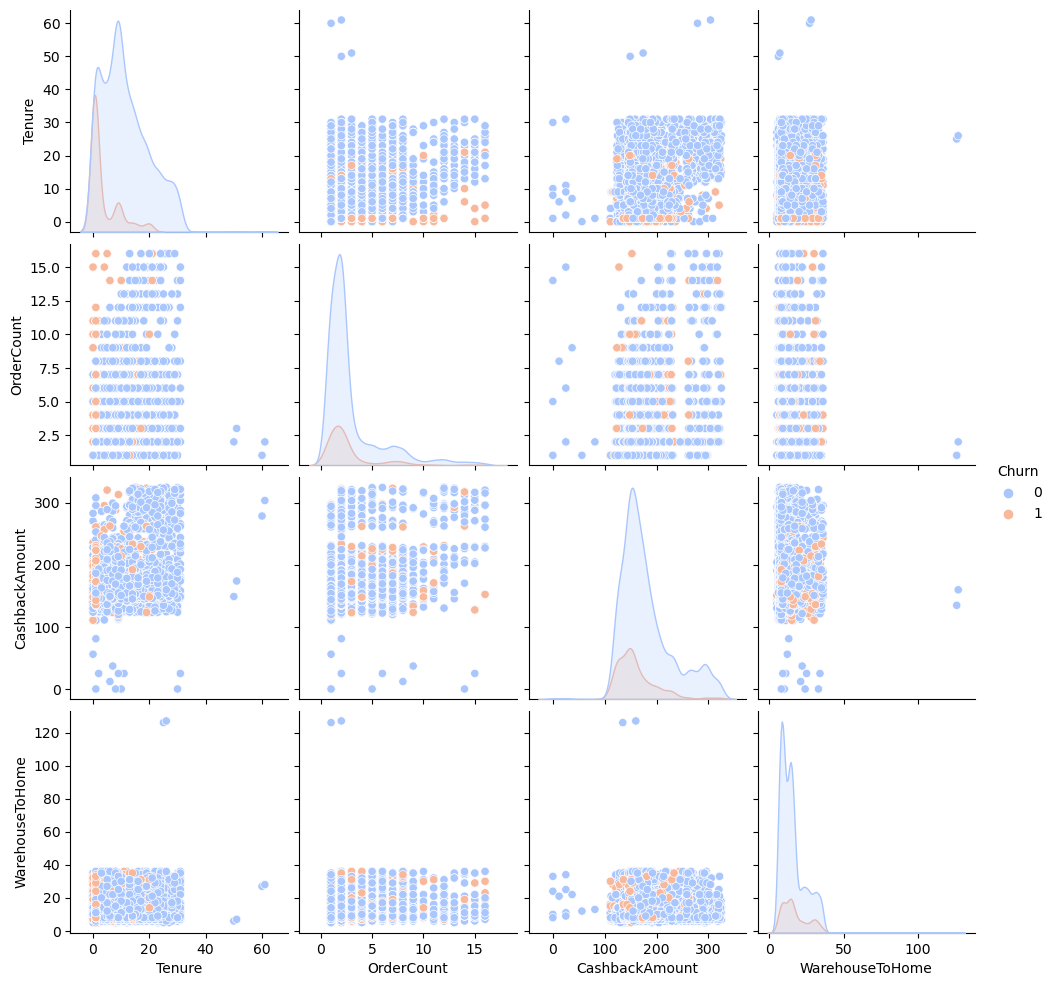

In [19]:
selected_features = ["Tenure", "OrderCount", "CashbackAmount", "WarehouseToHome"]

sns.pairplot(df[selected_features + ["Churn"]], hue="Churn", diag_kind="kde", palette="coolwarm")

plt.show()

### Observations

- Churners tend to have lower tenure, indicating that customers who leave likely have shorter histories with the platform.
- Churners generally have a lower order count, but some churners exist across all order levels.
- Higher cashback amounts appear to be associated with non-churners, suggesting that cashback incentives may improve retention.
- No strong visible trend between WarehouseToHome feature and churn, but extreme values should be examined further.

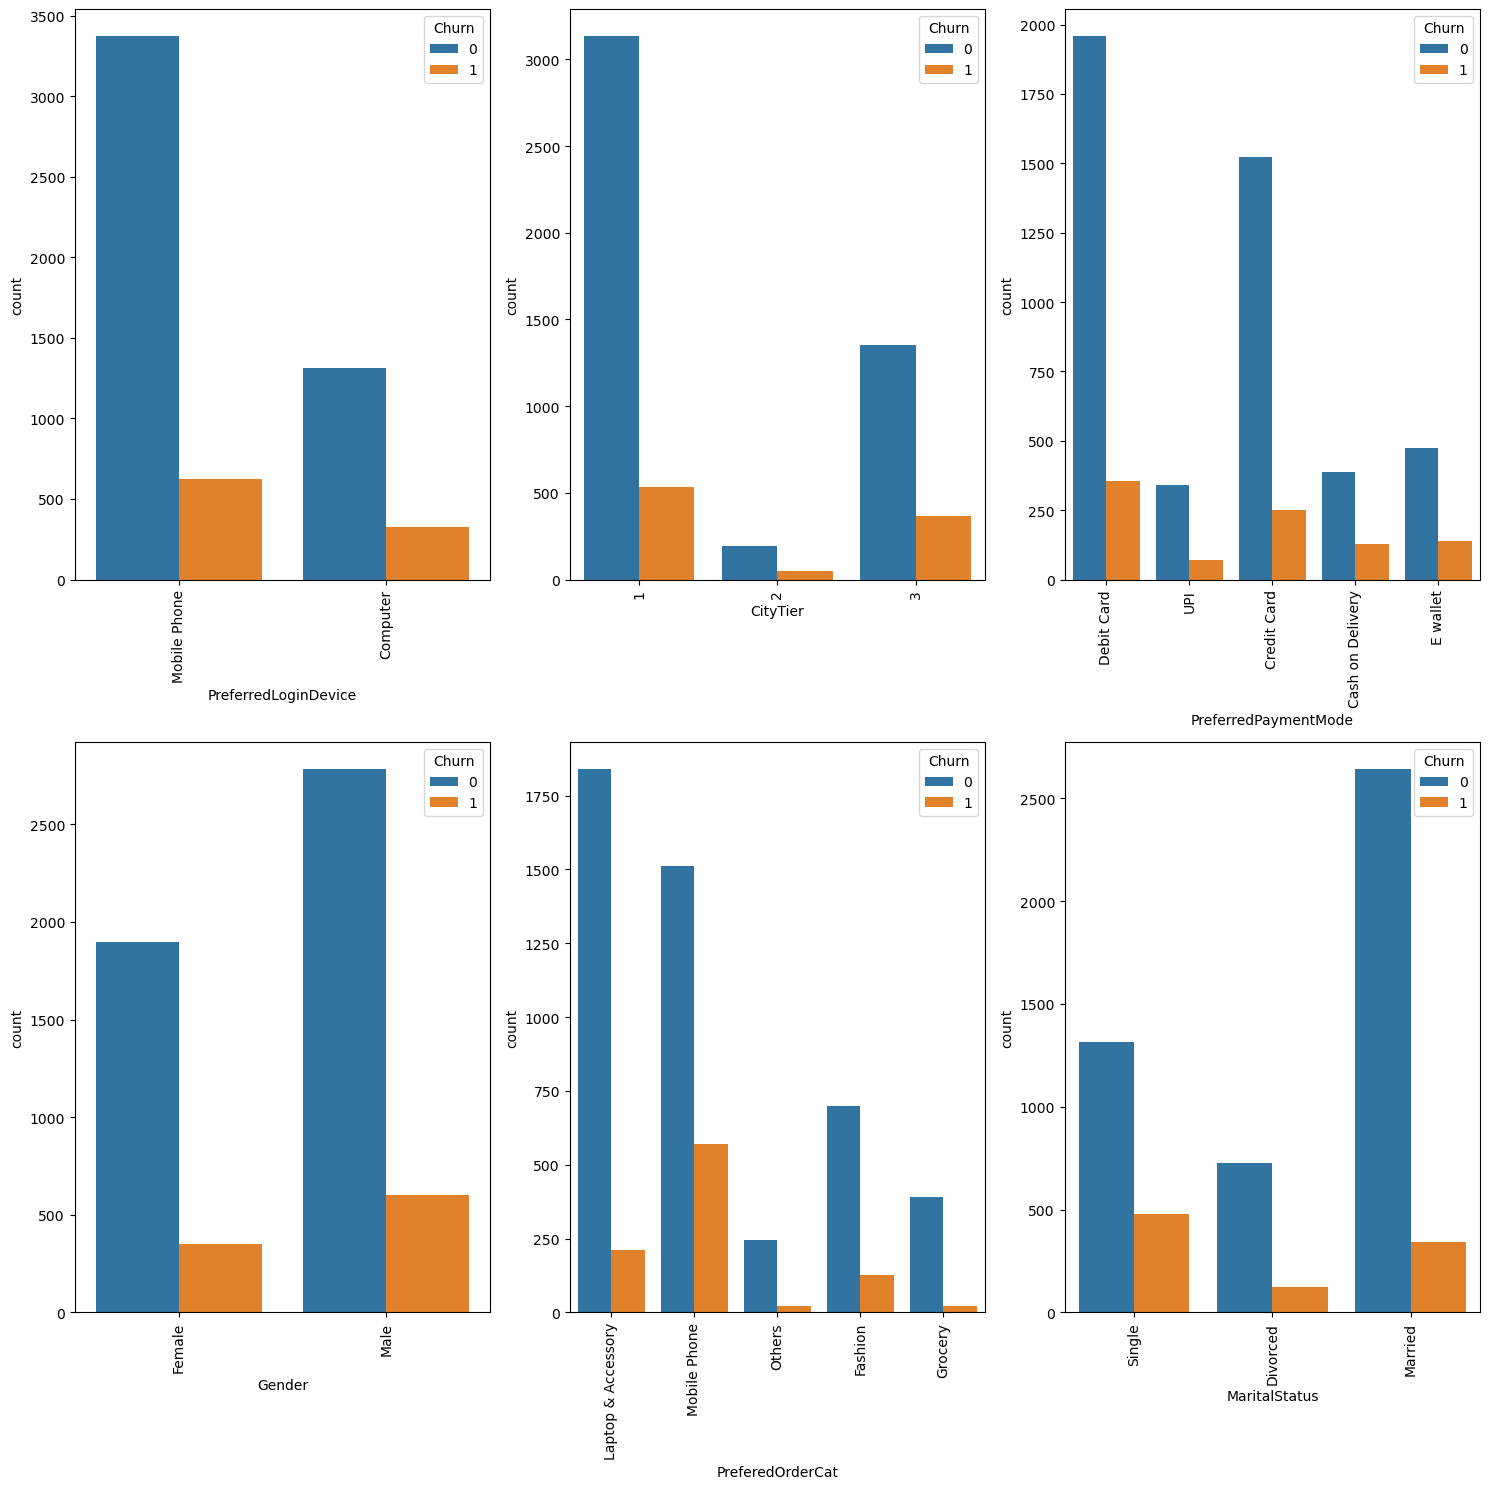

In [20]:
# list of categorical variables to plot
cat_vars = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 
            'PreferedOrderCat','MaritalStatus']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Churn', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

### Observations
- Most users log in via mobile phones, with a slightly higher churn rate than computer users.
- Customers from Tier 1 cities dominate, but churn is present across all tiers.
- UPI and debit cards are the most used payment methods, while credit card users churn the least.
- Laptops & Accessories and Mobile Phones are the most ordered categories, but Fashion and Groceries have slightly higher churn.
- Married customers are the majority, but single customers show a higher churn rate.

### Churn vs Other Features

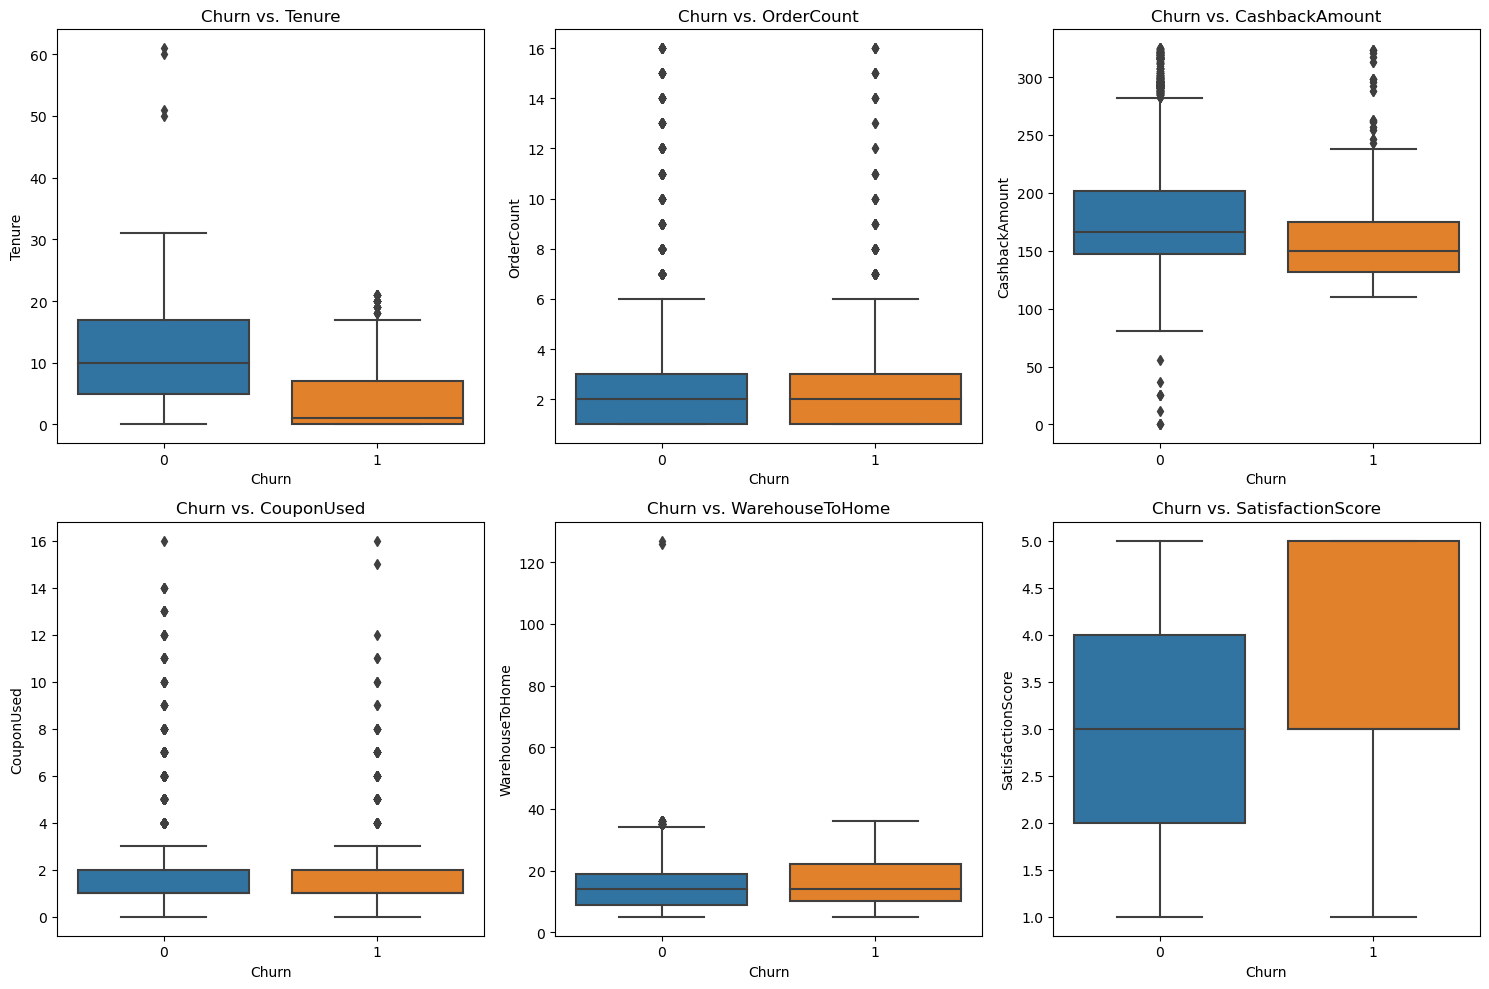

In [21]:
# Box plots for churn vs. numerical features
num_features = ['Tenure', 'OrderCount', 'CashbackAmount', 'CouponUsed', 'WarehouseToHome', 'SatisfactionScore']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df['Churn'], y=df[feature])
    plt.title(f'Churn vs. {feature}')

plt.tight_layout()
plt.show()

### Customer Behavior Analysis

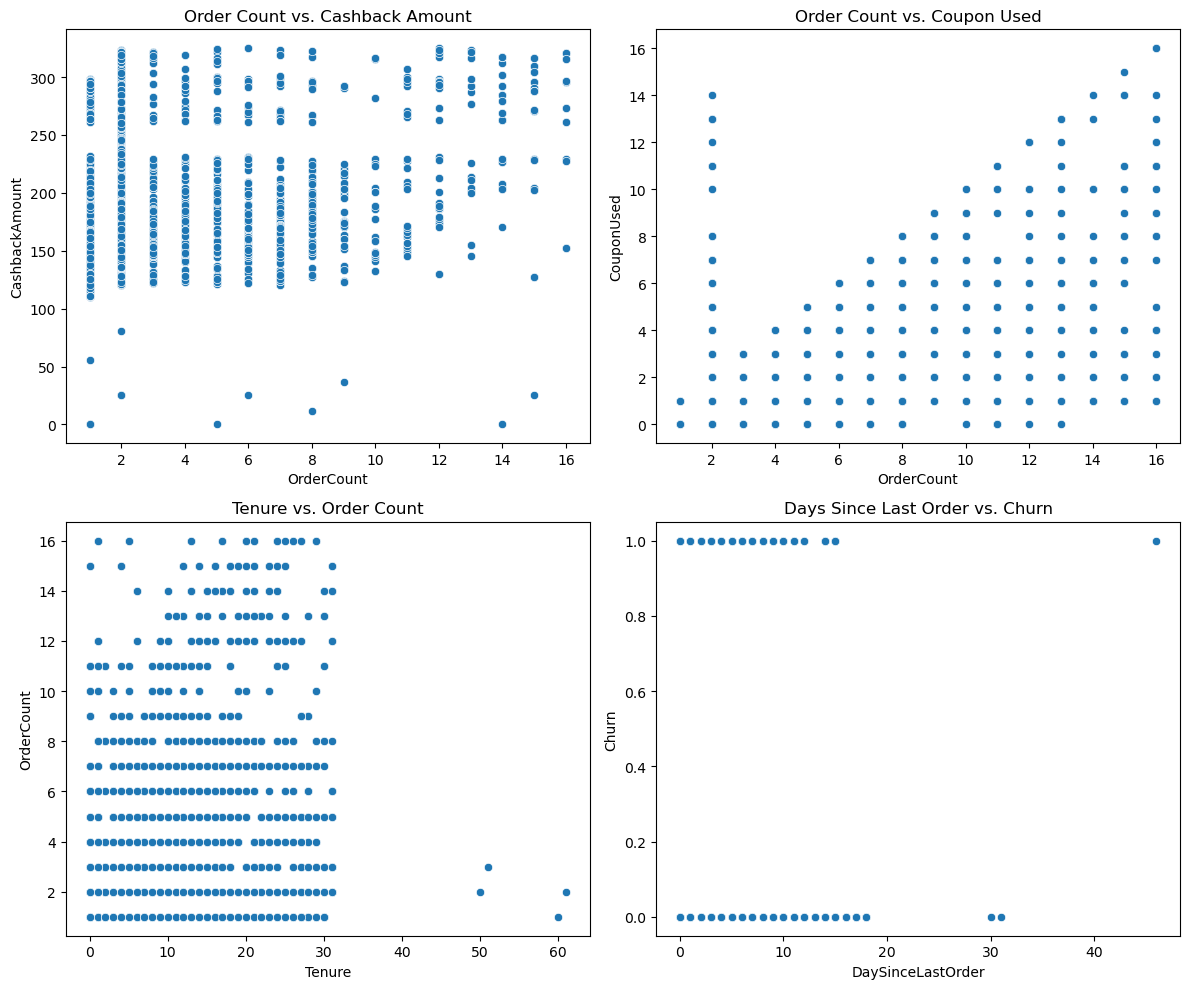

In [22]:
# Scatter Plots to visualize relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(x=df['OrderCount'], y=df['CashbackAmount'], ax=axes[0, 0])
axes[0, 0].set_title('Order Count vs. Cashback Amount')

sns.scatterplot(x=df['OrderCount'], y=df['CouponUsed'], ax=axes[0, 1])
axes[0, 1].set_title('Order Count vs. Coupon Used')

sns.scatterplot(x=df['Tenure'], y=df['OrderCount'], ax=axes[1, 0])
axes[1, 0].set_title('Tenure vs. Order Count')

sns.scatterplot(x=df['DaySinceLastOrder'], y=df['Churn'], ax=axes[1, 1])
axes[1, 1].set_title('Days Since Last Order vs. Churn')

plt.tight_layout()
plt.show()

### Observations
- **Order Count vs. Cashback Amount**: Higher order counts generally lead to higher cashback, but there's significant variance, suggesting cashback is influenced by other factors like order value or promotions.
- **Order Count vs. Coupon Used**: A clear positive correlation—customers with more orders tend to use more coupons, indicating that frequent shoppers take advantage of discounts.
- **Tenure vs. Order Count**: Most customers have a tenure below 30, and order count is distributed widely within this range, implying that tenure alone isn't a strong predictor of order frequency.
- **Days Since Last Order vs. Churn**: Churned customers (1) have higher values on the x-axis, meaning they haven't ordered in a long time, confirming that recency of purchase is a strong churn indicator.

### Feature Correlation

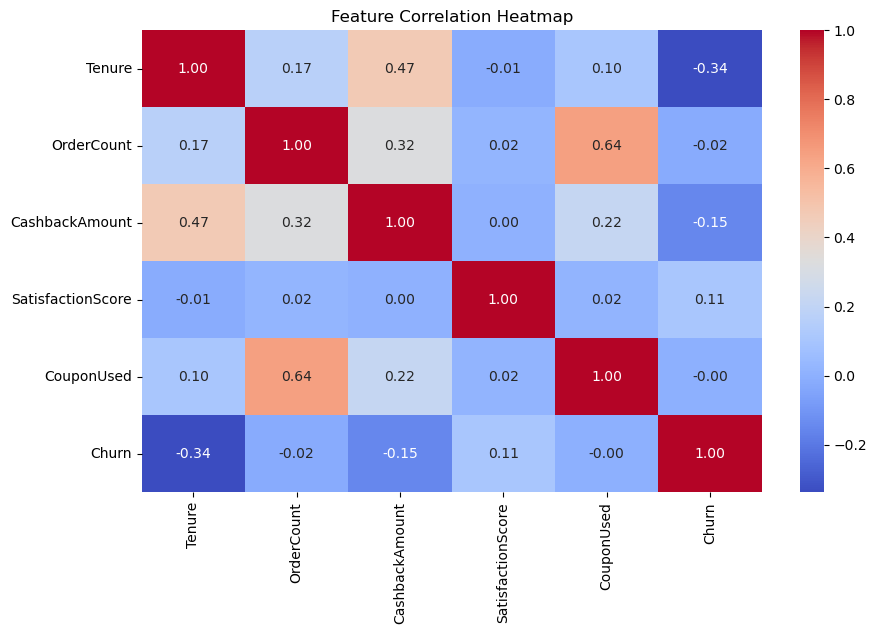

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Tenure', 'OrderCount', 'CashbackAmount', 'SatisfactionScore', 'CouponUsed', 'Churn']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [24]:
# Converting cleaned/modified dataframe to a csv file
df.to_csv('../data/ecommerce_churn_data_cleaned.csv', index= False)